# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [28]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GuilleMGN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [30]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key)

In [31]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = newsapi.get_everything(q = "Bitcoin", language = "en")

In [32]:
# Fetch the Ethereum news articles
ethereum_news_articles = newsapi.get_everything(q = "Ethereum", language = "en")

In [34]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_articles["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
    except AttributeError:
        pass

# Create Bitcoin DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...


In [35]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_articles["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
    except AttributeError:
        pass

# Create Ethereum DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,0.000,1.000,Hackers who made off with roughly $15 million ...
2,0.1779,0.052,0.000,0.948,"On some level, the new mayor is simply employi..."
3,0.0772,0.038,0.000,0.962,"Back in September\r\n, Robinhood announced pla..."
4,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...


In [36]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.006585,0.056950,0.046350,0.896700
std,0.422852,0.059066,0.056707,0.069472
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.426225,0.000000,0.000000,0.874750
50%,0.038600,0.048500,0.000000,0.912000
75%,0.328950,0.108750,0.088000,0.934000
max,0.680800,0.185000,0.169000,1.000000


In [37]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.095105,0.053250,0.022100,0.924650
std,0.297967,0.054394,0.045603,0.074845
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.889750
50%,0.000000,0.043500,0.000000,0.931500
75%,0.233900,0.090250,0.011750,1.000000
max,0.680800,0.185000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [38]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [39]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download("stopwords")
sw = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
sw_addons = {"the"}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GuilleMGN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addons = {"the"}
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [41]:
# Create a new tokens column for Bitcoin
bitcoin_df["Tokens"] = bitcoin_df["Text"].apply(tokenizer)
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...,"[even, arent, paying, attention, bitcoin, cryp..."
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...,"[denis, rusinovich, set, cryptocurrency, minin..."
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...,"[el, salvador, introduced, bitcoin, legal, ten..."
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...,"[officially, building, open, bitcoin, mining, ..."
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...,"[israeli, national, tal, prihar, pled, guilty,..."


In [42]:
# Create a new tokens column for Ethereum
ethereum_df["Tokens"] = ethereum_df["Text"].apply(tokenizer)
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,0.0000,0.000,0.000,1.000,"In a new blog post the company said that 4,836...","[new, blog, post, company, said, eth, bitcoin,..."
1,0.0000,0.000,0.000,1.000,Hackers who made off with roughly $15 million ...,"[hackers, made, roughly, million, ethereum, cr..."
2,0.1779,0.052,0.000,0.948,"On some level, the new mayor is simply employi...","[level, new, mayor, simply, employing, ageold,..."
3,0.0772,0.038,0.000,0.962,"Back in September\r\n, Robinhood announced pla...","[back, september, robinhood, announced, plan, ..."
4,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...,"[people, buy, cryptocurrencies, intended, hold..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [43]:
from collections import Counter
from nltk import ngrams

In [44]:
# Generate the Bitcoin N-grams where N=2
big_string_bitcoin = bitcoin_df["Text"].str.cat()
processed_bitcoin = tokenizer(big_string_bitcoin)
bigrams_bitcoin = Counter(ngrams(processed_bitcoin, n = 2))

In [45]:
# Generate the Ethereum N-grams where N=2
big_string_ethereum = ethereum_df["Text"].str.cat()
processed_ethereum = tokenizer(big_string_ethereum)
bigrams_ethereum = Counter(ngrams(processed_ethereum, n = 2))

In [47]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N = 3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Use token_count to get the top 10 words for Bitcoin
top_10_bitcoin = token_count(bigrams_bitcoin, 10)
top_10_bitcoin

[(('bitcoin', 'mining'), 4),
 (('alex', 'castro'), 3),
 (('building', 'open'), 3),
 (('open', 'bitcoin'), 3),
 (('mining', 'system'), 3),
 (('alongside', 'us'), 2),
 (('illustration', 'alex'), 2),
 (('international', 'monetary'), 2),
 (('officially', 'building'), 2),
 (('raedlegetty', 'imagesblock'), 2)]

In [49]:
# Use token_count to get the top 10 words for Ethereum
top_10_ethereum = token_count(bigrams_ethereum, 10)
top_10_ethereum

[(('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('charsfeb', 'reuters'), 2),
 (('charsto', 'believers'), 2),
 (('believers', 'open'), 2),
 (('open', 'public'), 2),
 (('public', 'blockchains'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

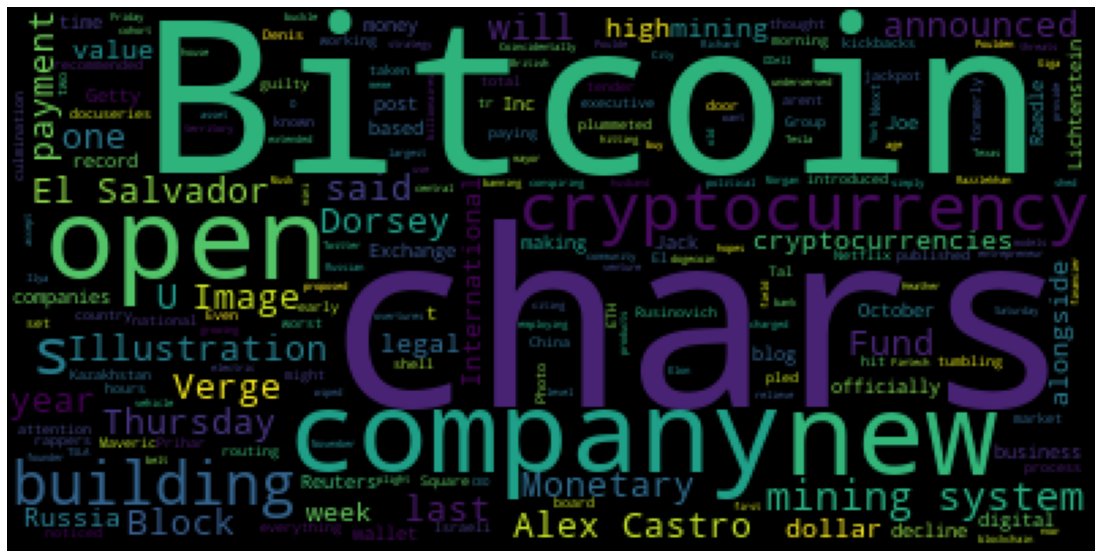

In [54]:
# Generate the Bitcoin word cloud
bitcoin_word_cloud = WordCloud().generate(big_string_bitcoin)
plt.imshow(bitcoin_word_cloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

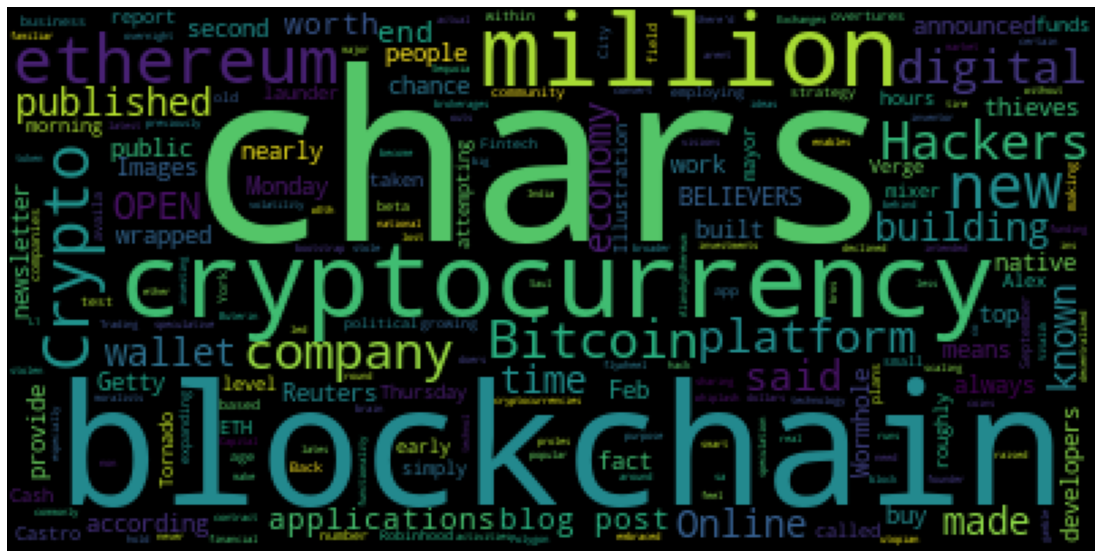

In [55]:
# Generate the Ethereum word cloud
ethereum_word_cloud = WordCloud().generate(big_string_ethereum)
plt.imshow(ethereum_word_cloud)
plt.axis("off")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---